# Predicting when a user agrees to rate the app

For my final project, I am using real data from my work at GSN Games, a mobile gaming company, to predict when a user will agree to rate the app.  The name of the app is Solitaire TriPeaks.

When a user installs the app and reaches Level 30, they are shown a dialog asking them to rate the App.  Since nearly all users who agree to rate the app give it a positive rating, we can potentially increase the number of ratings by surfacing the dialog at a time when we predict that the user will mostly likely agree to rate the app.

For my dataset, I included all users who installed the game between June 1, 2017 and May 31, 2018.  The total number of users (and therefore rows) is ~2.4M.

The following is a description of the columns in my dataset:
* **synthetic_id**:  This is the unique identifier of the user
* **red_stars**:  This is a measure of the user's engagement.  The more red stars, the higher the engagement.  The values range from 0-6
* **joined_club**:  This is a binary which indicates whether the user has joined a club.  Clubs are feature in the game that allows the user to collaborate with other users.  
* **tenure**:  This is the number of days between the time that the user installed the game and when they were asked to rate the game
* **payer**:  This is a binary which indicates whether the user has paid real money in the game.
* **win_loss**:  This is the user's win/loss percentage in the games played prior to being asked to rate the game.
* **rated_app**:  This is what we are trying to predict.  It is a binary indicating whether the user agreed to rate the app.

## Import dataset from dropbox

The data was exported from my company datawarehouse to a csv file on dropbox

In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics, tree

In [152]:
# Import the dataset from dropbox to a dataframe.
df = pd.read_csv('https://www.dropbox.com/s/xugzktmpkvniuyl/data_export_all.csv?dl=1')

## Examine the data using:  head, shape, describe, isnull, dtypes

In [3]:
df.head()

,synthetic_id,red_stars,joined_club,tenure,payer,win_loss,rated_app
0,000053a0-1f3e-401a-84f9-9579c023b13e,3,1,5,0,28,0
1,0001cc24-31a7-4bbc-bdf3-7bc1bcf874fa,2,1,6,0,36,1
2,000222f9-6962-4c85-a428-4bbd5377efea,0,0,0,0,41,1
3,00030a10-2e0e-402d-afd0-d24c4f229541,0,1,3,0,43,0
4,00031460-4be6-43a7-ac82-9c975a0d74a8,0,1,52,0,82,0


In [4]:
df.shape

(2429373, 7)

In [5]:
df.describe(include = 'all')

,synthetic_id,red_stars,joined_club,tenure,payer,win_loss,rated_app
count,2429373,2.429373e+06,2.429373e+06,2.429373e+06,2.429373e+06,2.429373e+06,2.429373e+06
unique,2429373,NaN,NaN,NaN,NaN,NaN,NaN
top,14c90347-7109-4169-8c29-3152715f50a1,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.867256e-01,7.486500e-01,1.181892e+01,2.270709e-02,4.551437e+01,1.896765e-01
std,NaN,1.221083e+00,4.337894e-01,3.280495e+01,1.489681e-01,1.879203e+01,3.920451e-01
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00
50%,NaN,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,4.100000e+01,0.000000e+00
75%,NaN,2.000000e+00,1.000000e+00,8.000000e+00,0.000000e+00,5.600000e+01,0.000000e+00


In [16]:
df.isnull().sum()

synthetic_id    0
red_stars       0
joined_club     0
tenure          0
payer           0
win_loss        0
rated_app       0
dtype: int64

In [17]:
df.dtypes

synthetic_id    object
red_stars        int64
joined_club      int64
tenure           int64
payer            int64
win_loss         int64
rated_app        int64
dtype: object

## Histograms

Generate a pair of histograms for each independent variable for the cases where the binary dependent variable (rated_app) is 0 and 1.

For all independent variables, it appears that the rated_app = 0 and rated_app = 1 histograms look very similar.  This portends a weak predictive model.

### Histograms for:  red_stars

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c99d1c128>]],
      dtype=object)

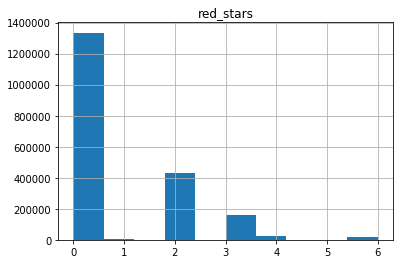

In [155]:
df[(df.rated_app == 0)].hist(column='red_stars')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d04e161d0>]],
      dtype=object)

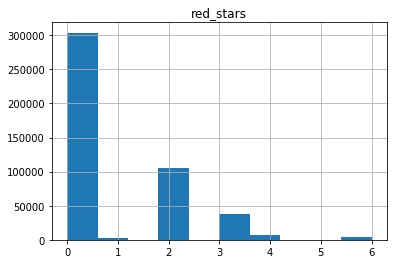

In [7]:
df[(df.rated_app == 1)].hist(column='red_stars') 

### Histograms for:  joined_club

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d04e3fa20>]],
      dtype=object)

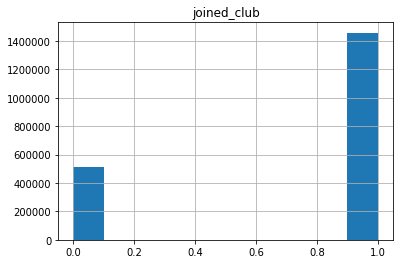

In [8]:
df[(df.rated_app == 0)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cfb5e9320>]],
      dtype=object)

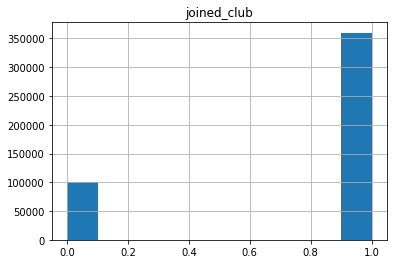

In [9]:
df[(df.rated_app == 1)].hist(column='joined_club') 

### Histograms for:  tenure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d01016d68>]],
      dtype=object)

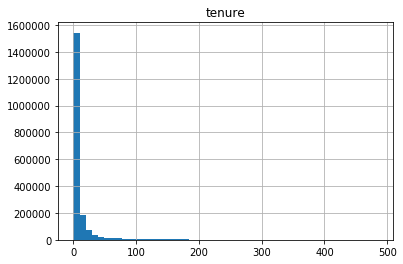

In [10]:
df[(df.rated_app == 0)].hist(column='tenure', bins = 50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d00f4d4a8>]],
      dtype=object)

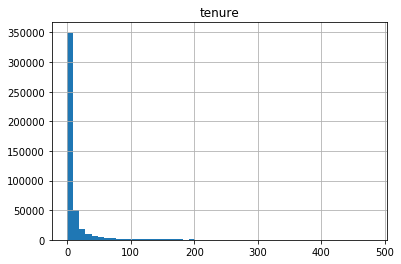

In [11]:
df[(df.rated_app == 1)].hist(column='tenure', bins = 50) 

### Histograms for:  payer

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d00e8bf98>]],
      dtype=object)

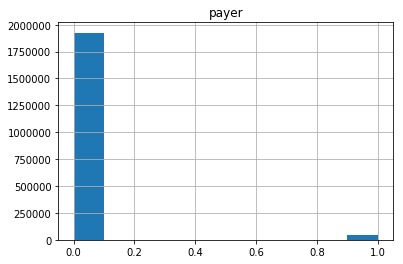

In [12]:
df[(df.rated_app == 0)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d00d72908>]],
      dtype=object)

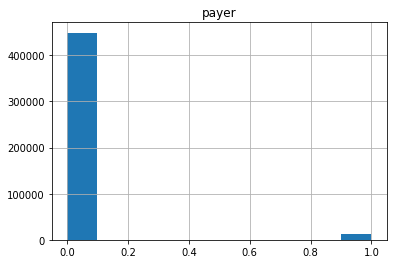

In [13]:
df[(df.rated_app == 1)].hist(column='payer') 

### Histograms for:  win_loss

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d00dd0a20>]],
      dtype=object)

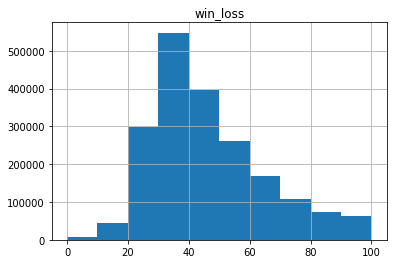

In [14]:
df[(df.rated_app == 0)].hist(column='win_loss')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d00decd30>]],
      dtype=object)

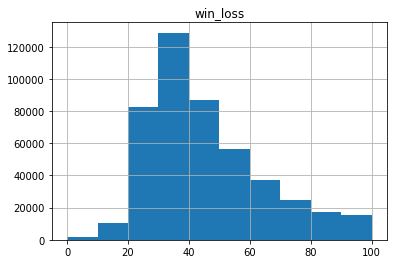

In [15]:
df[(df.rated_app == 1)].hist(column='win_loss') 

## Correlations

In [22]:
df.corr()

,red_stars,joined_club,tenure,payer,win_loss,rated_app
red_stars,1.000000,0.373317,0.158152,0.097228,-0.096658,0.016742
joined_club,0.373317,1.000000,0.208699,0.088322,-0.159354,0.036304
tenure,0.158152,0.208699,1.000000,0.040395,-0.008321,0.007538
payer,0.097228,0.088322,0.040395,1.000000,0.027716,0.009717
win_loss,-0.096658,-0.159354,-0.008321,0.027716,1.000000,-0.014697
rated_app,0.016742,0.036304,0.007538,0.009717,-0.014697,1.000000


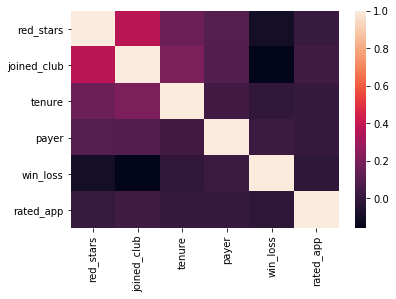

In [25]:
sns.heatmap(df.corr())

## Create test-train Logistic Regression model

Prepare a feature matrix (X) and response (y) for scikit-learn.

In [38]:
# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['red_stars', 'joined_club', 'tenure', 'payer', 'win_loss']
X = df[feature_cols]
y = df.rated_app

### Get a logistic regression score using a test-train split

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

0.77685933912349

### Get "baseline" score

In [158]:
# Baseline accuracy

1. - y_train.mean()

0.7764493470142159

### Create a confusion matrix of predictions on our test set using metrics.confusion_matrix.

In [43]:
# Get probability predictions.
logit_pred_proba = logreg.predict_proba(X_test)[:,1]

In [46]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[492208,      0],
       [115136,      0]])

## Decision Tree

In [159]:
# Tree instantiation
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [160]:
# Evaluate model
clf.score(X_test, y_test)

0.7698997418673968

# Split iOS and Android

Since the original strategy yielded poor results, we'll re-attempt by separating iOS and Android.  This is a logical split since each platform has its own Store for app ratings.

## Import iOS dataset from dropbox 

In [150]:
# Import the dataset from dropbox to a dataframe.
df_ios = pd.read_csv('https://www.dropbox.com/s/1i5fyai7ws96um4/ios_data_export_all.csv?dl=1')

## Histograms

Generate a pair of histograms for each independent variable for the cases where the binary dependent variable (rated_app) is 0 and 1.

For all independent variables, it appears that the rated_app = 0 and rated_app = 1 histograms look very similar.  This portends a weak predictive model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d521fe048>]],
      dtype=object)

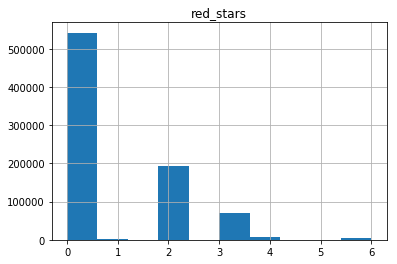

In [90]:
df_ios[(df_ios.rated_app == 0)].hist(column='red_stars')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5217a668>]],
      dtype=object)

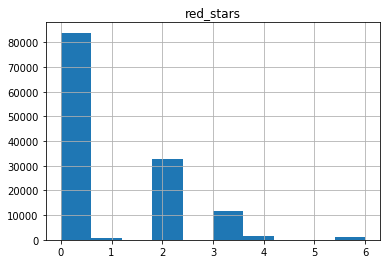

In [91]:
df_ios[(df_ios.rated_app == 1)].hist(column='red_stars') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5211eb00>]],
      dtype=object)

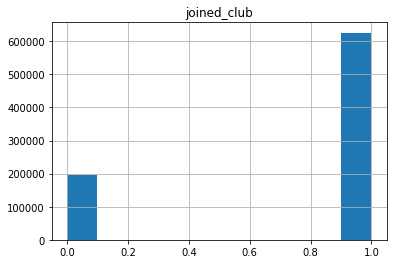

In [92]:
df_ios[(df_ios.rated_app == 0)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d52093470>]],
      dtype=object)

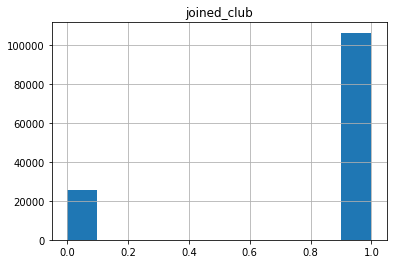

In [93]:
df_ios[(df_ios.rated_app == 1)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5205ad68>]],
      dtype=object)

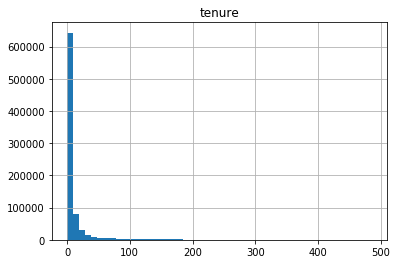

In [94]:
df_ios[(df_ios.rated_app == 0)].hist(column='tenure', bins = 50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cedb79358>]],
      dtype=object)

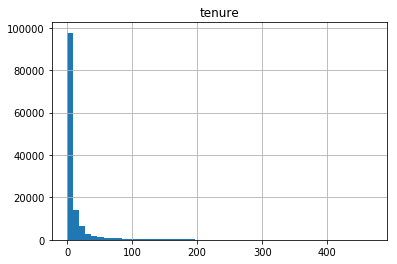

In [95]:
df_ios[(df_ios.rated_app == 1)].hist(column='tenure', bins = 50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cedd054a8>]],
      dtype=object)

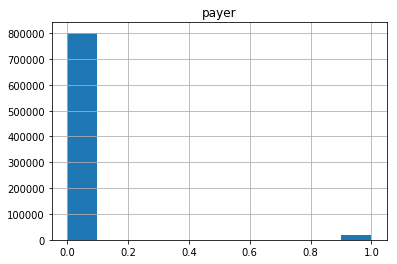

In [96]:
df_ios[(df_ios.rated_app == 0)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd5642d68>]],
      dtype=object)

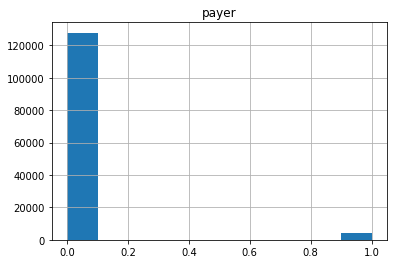

In [97]:
df_ios[(df_ios.rated_app == 1)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cc38316a0>]],
      dtype=object)

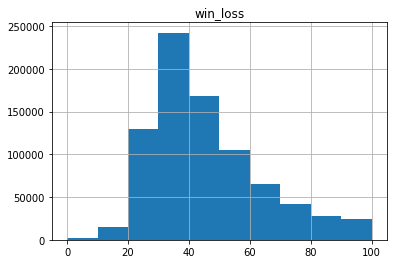

In [98]:
df_ios[(df_ios.rated_app == 0)].hist(column='win_loss')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cd7796860>]],
      dtype=object)

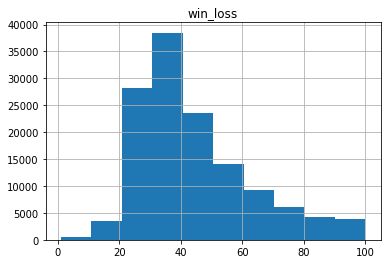

In [99]:
df_ios[(df_ios.rated_app == 1)].hist(column='win_loss') 

## Correlations

In [102]:
df_ios.corr()

,red_stars,joined_club,tenure,payer,win_loss,rated_app
red_stars,1.000000,0.370253,0.178024,0.104466,-0.099467,0.018466
joined_club,0.370253,1.000000,0.195060,0.088485,-0.159207,0.037410
tenure,0.178024,0.195060,1.000000,0.048768,-0.002191,0.017290
payer,0.104466,0.088485,0.048768,1.000000,0.023103,0.015678
win_loss,-0.099467,-0.159207,-0.002191,0.023103,1.000000,-0.019020
rated_app,0.018466,0.037410,0.017290,0.015678,-0.019020,1.000000


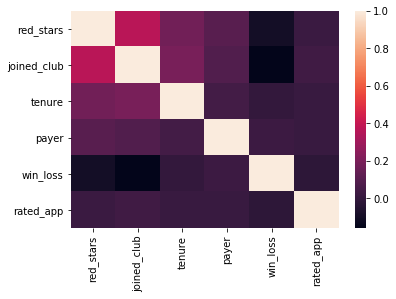

In [103]:
sns.heatmap(df_ios.corr())

## Create test-train Logistic Regression model

Prepare a feature matrix (X) and response (y) for scikit-learn.

In [104]:
# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['red_stars', 'joined_club', 'tenure', 'payer', 'win_loss']
X = df_ios[feature_cols]
y = df_ios.rated_app

### Get a logistic regression score using a test-train split

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

0.8615063252910976

### Get "baseline" score

In [106]:
# Baseline accurace

1. - y_train.mean()

0.8618053390341194

### Create a confusion matrix of predictions on our test set using metrics.confusion_matrix.

In [110]:
# Get probability predictions.
logit_pred_proba = logreg.predict_proba(X_test)[:,1]

In [111]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[205390,      0],
       [ 33018,      0]])

## Decision Tree

In [107]:
# Tree instantiation
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [108]:
# Evaluate model
clf.score(X_test, y_test)

0.8547951411026475

# Android

## Import Android dataset from dropbox

In [128]:
# Import the dataset from dropbox to a dataframe.
df_android = pd.read_csv('https://www.dropbox.com/s/blsmkjgubxmr4y4/android_data_export_all.csv?dl=1')

## Histograms

Generate a pair of histograms for each independent variable for the cases where the binary dependent variable (rated_app) is 0 and 1.

For all independent variables, it appears that the rated_app = 0 and rated_app = 1 histograms look very similar.  This portends a weak predictive model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cb948cbe0>]],
      dtype=object)

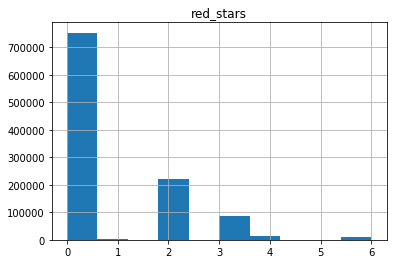

In [129]:
df_android[(df_android.rated_app == 0)].hist(column='red_stars')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ca0c7d4a8>]],
      dtype=object)

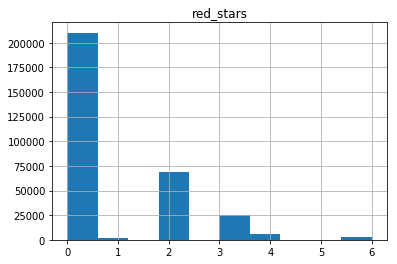

In [130]:
df_android[(df_android.rated_app == 1)].hist(column='red_stars') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9cbbed68>]],
      dtype=object)

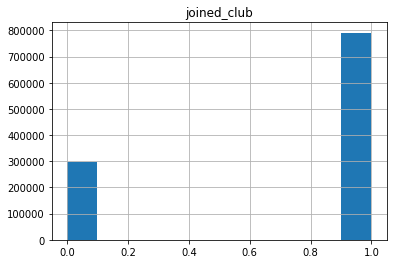

In [131]:
df_android[(df_android.rated_app == 0)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9cb3b7f0>]],
      dtype=object)

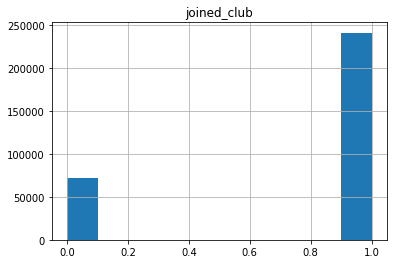

In [132]:
df_android[(df_android.rated_app == 1)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9cb03198>]],
      dtype=object)

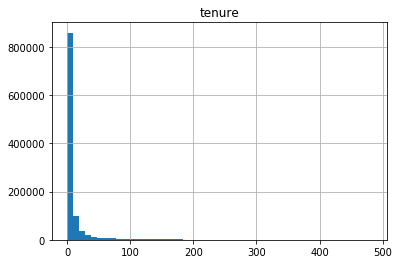

In [133]:
df_android[(df_android.rated_app == 0)].hist(column='tenure', bins = 50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9c9d8908>]],
      dtype=object)

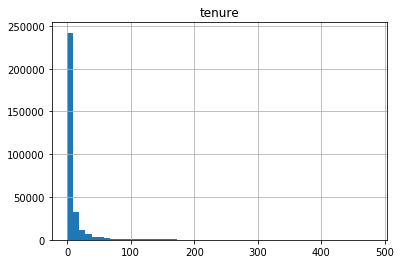

In [134]:
df_android[(df_android.rated_app == 1)].hist(column='tenure', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9c923d68>]],
      dtype=object)

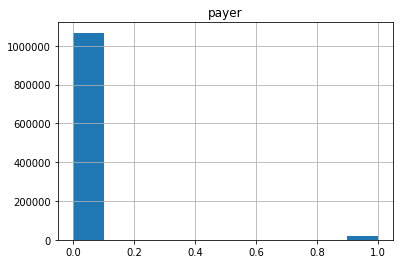

In [135]:
df_android[(df_android.rated_app == 0)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9cb87710>]],
      dtype=object)

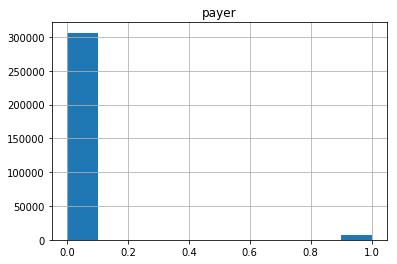

In [136]:
df_android[(df_android.rated_app == 1)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9c8401d0>]],
      dtype=object)

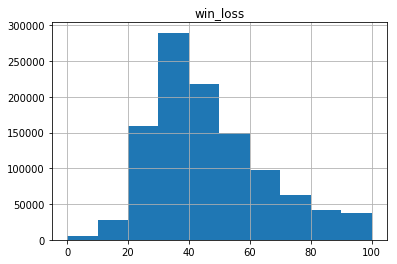

In [137]:
df_android[(df_android.rated_app == 0)].hist(column='win_loss')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c9c7a1198>]],
      dtype=object)

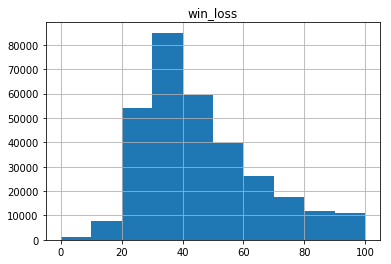

In [138]:
df_android[(df_android.rated_app == 1)].hist(column='win_loss')

## Correlations

In [139]:
df_android.corr()

,red_stars,joined_club,tenure,payer,win_loss,rated_app
red_stars,1.000000,0.373976,0.141771,0.092156,-0.091875,0.018427
joined_club,0.373976,1.000000,0.217135,0.087377,-0.157354,0.040947
tenure,0.141771,0.217135,1.000000,0.032762,-0.007945,0.002471
payer,0.092156,0.087377,0.032762,1.000000,0.032797,0.008076
win_loss,-0.091875,-0.157354,-0.007945,0.032797,1.000000,-0.016013
rated_app,0.018427,0.040947,0.002471,0.008076,-0.016013,1.000000


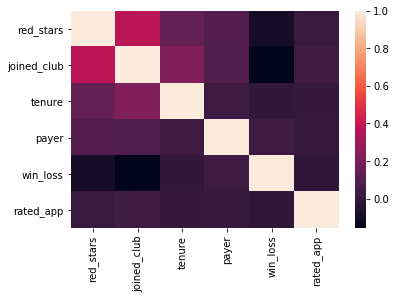

In [140]:
sns.heatmap(df_android.corr())

## Create test-train Logistic Regression model

Prepare a feature matrix (X) and response (y) for scikit-learn.

In [141]:
# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['red_stars', 'joined_club', 'tenure', 'payer', 'win_loss']
X = df_android[feature_cols]
y = df_android.rated_app

### Get a logistic regression score using a test-train split

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

logreg.score(X_test, y_test)

0.7756956031888647

### Get "baseline" score

In [143]:
# Baseline accurace

1. - y_train.mean()

0.7768372593612377

### Create a confusion matrix of predictions on our test set using metrics.confusion_matrix.

In [144]:
# Get probability predictions.
logit_pred_proba = logreg.predict_proba(X_test)[:,1]

In [145]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

array([[271955,      0],
       [ 78640,      0]])

## Decision Tree

In [146]:
# Tree instantiation
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [147]:
# Evaluate model
clf.score(X_test, y_test)

0.7687445628146437

In [148]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                         feature_names=X_train.columns,  
                         class_names=df.columns[6],  
                         filled=True, rounded=True,  
                         special_characters=True)